In [3]:
import numpy as np
import matplotlib.pyplot as plt

import synth

Segment 1: start=0.8989186340566252, end=0.7423786805741097, length=134421.0
Segment 2: start=0.7423786805741097, end=0.1989725705282227, length=17888.0
Segment 3: start=0.1989725705282227, end=0.9013556076499312, length=15339.0
Segment 4: start=0.9013556076499312, end=0.8531402944372105, length=30508.0
Segment 5: start=0.8531402944372105, end=0.0397772435562358, length=18385.0
Segment 6: start=0.0397772435562358, end=0.19955262266699159, length=12232.0
Segment 7: start=0.19955262266699159, end=0.5567085149029511, length=34188.0
Segment 8: start=0.5567085149029511, end=0.057376148989379705, length=19488.0
Segment 9: start=0.057376148989379705, end=0.8450905142415513, length=61394.0
Segment 10: start=0.8450905142415513, end=0.9684156584731356, length=38037.0
Segment 11: start=0.9684156584731356, end=0.024419529862971134, length=5330.0
Segment 12: start=0.024419529862971134, end=0.38440724835668816, length=13867.0
Segment 13: start=0.38440724835668816, end=0.9222709792382467, length=2321

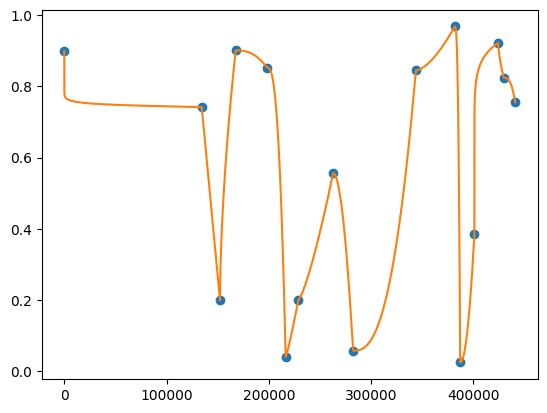

In [61]:
a = np.random.rand(3,16)

a[0,:] = np.sort(a[0,:])


sr = 44100
duration = 10
samples = int(sr * duration)

a[0,:] = np.round(a[0,:]*samples)
a[0,0] = 0
a[0,-1] = samples

a[2,:]*= 3

plt.plot(a[0,:], a[1,:], 'o')

env = []

for i in range(1, a.shape[1]):
    start = a[1,i-1]
    end = a[1,i]
    length = a[0,i] - a[0,i-1]

    print(f"Segment {i}: start={start}, end={end}, length={length}")

    segment = start + np.linspace(0, 1, int(a[0,i]-a[0,i-1])) ** a[2,i-1] * (end - start)
    env.append(segment)

env = np.concatenate(env)
plt.plot(np.arange(len(env)), env, label='Envelope')

plt.show()